# Creating University Program Curriculumn based on Clustering of Skills in Job Postings 


### Import Python libraries

In [7]:
#Import Statements
import numpy as np
import pandas as pd
import os
import requests
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
## Machine Learning libraries
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
from scipy import zeros as sci_zeros
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
simplefilter("ignore", ClusterWarning)

### Load job postings web-scraped from Indeed.com

In [9]:

#IF using google collab
from google.colab import files
results = files.upload()

#If using Local jupyter
## Read csv file (dataset)
#filename_data = 'webscraping_results_assignment3.csv'
#results = pd.read_csv(filename_data)

#Change column names
results.rename(columns={'Job_Title': 'Title', 'Company_Name': 'Company', 'Job_Description': 'Descriptions'}, inplace=True)

### Extract skills from job postings

Replace with your own classification of skills. You may use ChatGPT to generate Python code for extracting skills from job descriptions.

In [10]:
## Programming/systems skills
sskills = {}
sskills['Python'] = []
sskills['Matlab'] = []
sskills['SQL'] = []
sskills['Excel'] = []
sskills['Tableau'] = []
sskills['Power BI'] = []
sskills['Git'] = []
sskills['Apache Hadoop'] = []
sskills['Apache Spark'] = []
sskills['R'] = []
sskills['Matplotlib'] = []

## Technical, data-related, modeling/algorithms skills
tskills = {}
tskills['Data Management']=[]
tskills['Big Data']=[]
tskills['Machine Learning']=[]
tskills['Deep Learning']=[]
tskills['Cloud Computing']=[]
# tskills['Modeling']=[]
tskills['A/B Testing']=[]
tskills['Statistical Analysis']=[]
tskills['Linear Algebra']=[]
tskills['Calculus']=[]
tskills['Probability Theory']=[]
tskills['Data Base Knowledge']=[]
tskills['Data Cleaning and Preprocessing']=[]
tskills['Data Visualization']=[]
tskills['Optimization']=[]

## Business intelligence, project management, consulting, negotiation skills
bskills={}
bskills['Project Management']=[]
bskills['Consulting']=[]
bskills['Business Intelligence']=[]
bskills['Problem Solving']=[]

## Teamwork and communication skills
pskills={}
pskills['Teamwork']=[]
pskills['Creativity']=[]
pskills['Organization']=[]
pskills['Time Management']=[]
pskills['Communication']=[]


## Extract skills from job postings
for ir, dfr in results.iterrows():
    cleantext = str(dfr["Descriptions"])

    if("python " in cleantext.lower()) or ("python," in cleantext.lower()) or ("python." in cleantext.lower()):
        sskills['Python'].append(1)
    else:
        sskills['Python'].append(0)
    
    if("matlab " in cleantext.lower()) or ("matlab," in cleantext.lower()) or ("matlab." in cleantext.lower()):
        sskills['Matlab'].append(1)
    else:
        sskills['Matlab'].append(0)

    if("sql" in cleantext.lower()) or ("structured quer" in cleantext.lower()) or ("server" in cleantext.lower()):
        sskills['SQL'].append(1)
    else:
        sskills['SQL'].append(0)
        
    if("excel " in cleantext.lower()) or ("excel," in cleantext.lower()) or ("excel." in cleantext.lower()):
        sskills['Excel'].append(1)
    else:
        sskills['Excel'].append(0)
    
    if("tableau " in cleantext.lower()) or ("tableau," in cleantext.lower()) or ("tableau." in cleantext.lower()):
        sskills['Tableau'].append(1)
    else:
        sskills['Tableau'].append(0)

    if("power bi " in cleantext.lower()) or ("power bi," in cleantext.lower()) or ("power bi." in cleantext.lower()):
        sskills['Power BI'].append(1)
    else:
        sskills['Power BI'].append(0)

    if("git " in cleantext.lower()) or ("git," in cleantext.lower()) or ("git." in cleantext.lower()):
        sskills['Git'].append(1)
    else:
        sskills['Git'].append(0)

    if("hadoop " in cleantext.lower()) or ("hadoop," in cleantext.lower()) or ("hadoop." in cleantext.lower()):
        sskills['Apache Hadoop'].append(1)
    else:
        sskills['Apache Hadoop'].append(0)
        
    if("spark " in cleantext.lower()) or ("spark," in cleantext.lower()) or ("spark." in cleantext.lower()):
        sskills['Apache Spark'].append(1)
    else:
        sskills['Apache Spark'].append(0)
        
    if(" r " in cleantext.lower()) or (" r," in cleantext.lower()) or (" r." in cleantext.lower()):
        sskills['R'].append(1)
    else:
        sskills['R'].append(0)

    if("matplotlib " in cleantext.lower()) or ("matplotlib," in cleantext.lower()) or ("matplotlib." in cleantext.lower()):
        sskills['Matplotlib'].append(1)
    else:
        sskills['Matplotlib'].append(0)        
        
    if("databas" in cleantext.lower()) or ("data mana" in cleantext.lower()) or ("data ha" in cleantext.lower()) or ("data lak" in cleantext.lower()) or ("data war" in cleantext.lower()) or ("data eng" in cleantext.lower())  or ("data proc" in cleantext.lower()):
        tskills['Data Management'].append(1)
    else:
        tskills['Data Management'].append(0)
        
    if("big data" in cleantext.lower()):
        tskills['Big Data'].append(1)
    else:
        tskills['Big Data'].append(0)

    if("machine learning" in cleantext.lower()) or (" ml" in cleantext.lower()):
        tskills['Machine Learning'].append(1)
    else:
        tskills['Machine Learning'].append(0)

    if("deep learning" in cleantext.lower()) or ("neural network" in cleantext.lower()):
        tskills['Deep Learning'].append(1)
    else:
        tskills['Deep Learning'].append(0)
        
    if("cloud computing" in cleantext.lower()) or ("azure" in cleantext.lower()) or ("aws" in cleantext.lower()) or ("amazon web services" in cleantext.lower()):
        tskills['Cloud Computing'].append(1)
    else:
        tskills['Cloud Computing'].append(0)  

    if("a/b testing" in cleantext.lower()):
        tskills['A/B Testing'].append(1)
    else:
        tskills['A/B Testing'].append(0)
        
    if("statistics" in cleantext.lower()) or ("statistical ana" in cleantext.lower()):
        tskills['Statistical Analysis'].append(1)
    else:
        tskills['Statistical Analysis'].append(0)
        
    if("linear algebra" in cleantext.lower()):
        tskills['Linear Algebra'].append(1)
    else:
        tskills['Linear Algebra'].append(0)
        
    if("calculus" in cleantext.lower()):
        tskills['Calculus'].append(1)
    else:
        tskills['Calculus'].append(0)
        
    if("probability" in cleantext.lower()):
        tskills['Probability Theory'].append(1)
    else:
        tskills['Probability Theory'].append(0)
        
    if("data base" in cleantext.lower()) or ("database" in cleantext.lower()):
        tskills['Data Base Knowledge'].append(1)
    else:
        tskills['Data Base Knowledge'].append(0)
        
    if("data cleaning" in cleantext.lower()) or ("preprocessing" in cleantext.lower()):
        tskills['Data Cleaning and Preprocessing'].append(1)
    else:
        tskills['Data Cleaning and Preprocessing'].append(0)
        
    if("data visualization" in cleantext.lower()) or ("visual" in cleantext.lower()):
        tskills['Data Visualization'].append(1)
    else:
        tskills['Data Visualization'].append(0)
        
    if("optimization" in cleantext.lower()):
        tskills['Optimization'].append(1)
    else:
        tskills['Optimization'].append(0)

        
    if("project man" in cleantext.lower()) or ("management" in cleantext.lower()):
        bskills['Project Management'].append(1)
    else:
        bskills['Project Management'].append(0)
        
    if("consulting" in cleantext.lower()) or ("consult" in cleantext.lower()):
        bskills['Consulting'].append(1)
    else:
        bskills['Consulting'].append(0)
        
    if("business intel" in cleantext.lower()):
        bskills['Business Intelligence'].append(1)
    else:
        bskills['Business Intelligence'].append(0)
        
    if("problem solving" in cleantext.lower()):
        bskills['Problem Solving'].append(1)
    else:
        bskills['Problem Solving'].append(0)
        

    if("teamwork" in cleantext.lower()) or ("collaboration" in cleantext.lower()):
        pskills['Teamwork'].append(1)
    else:
        pskills['Teamwork'].append(0)     
        
    if("creativit" in cleantext.lower()) or ("creative" in cleantext.lower()) or ("creat" in cleantext.lower()):
        pskills['Creativity'].append(1)
    else:
        pskills['Creativity'].append(0)
        
    if("organization" in cleantext.lower()):
        pskills['Organization'].append(1)
    else:
        pskills['Organization'].append(0)       

    if("time management" in cleantext.lower()):
        pskills['Time Management'].append(1)
    else:
        pskills['Time Management'].append(0)          
        
    if("communication" in cleantext.lower()):
        pskills['Communication'].append(1)
    else:
        pskills['Communication'].append(0)

In [11]:
## Create dataframe with extracted skills (1 if a skill was found in job description, 0 if a skills was not found in job description)
df1 = results[['Title', 'Company', 'Location', 'Descriptions']].copy()
df2 = pd.DataFrame(sskills)
df3 = pd.DataFrame(tskills)
df4 = pd.DataFrame(bskills)
df5 = pd.DataFrame(pskills)
frames = [df1, df2, df3, df4, df5]
res = pd.concat(frames, axis = 1)
res.head()
#Dataframe with only the relevant skill data
plotting = pd.concat([df2, df3, df4, df5],axis = 1)



In [12]:
plotting.head()

,Python,Matlab,SQL,Excel,Tableau,Power BI,Git,Apache Hadoop,Apache Spark,R,...,Optimization,Project Management,Consulting,Business Intelligence,Problem Solving,Teamwork,Creativity,Organization,Time Management,Communication
0,0,0,1,0,1,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
1,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,1
3,0,1,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,1,0,0,0,0,1,...,0,1,0,1,0,0,1,1,0,1


In [13]:
print(type(res))

<class 'pandas.core.frame.DataFrame'>


In [14]:
!pip install gensim

In [15]:
#Use Gensim doc2vec to embeddings of paragraphs accordingly
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize  # You may need to install nltk: pip install nltk
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
#Stop words to avoid common words
stop_words = set(stopwords.words('english'))
#Tokenize the paragraphs
tokenized_docs = [
    [word.lower() for word in word_tokenize(doc) if word.isalnum() and word.lower() not in stop_words]
    for doc in res.Descriptions
]
tagged_data = [TaggedDocument(words=doc, tags=[str(i)]) for i, doc in enumerate(tokenized_docs)]

#Doc2vec model with respective parameters
model = Doc2Vec(vector_size=100, min_count=2, workers=4, epochs=50)
model.build_vocab(tagged_data)

#Train the model
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)
# Get the document embeddings
document_embeddings = [model.infer_vector(doc) for doc in tokenized_docs]
#Print sample embeddings
print(document_embeddings[1])

[-0.80817777 -0.5804901  -0.6200197  -0.71292096  0.27054217 -1.8886882
 -0.9696      1.1884217  -0.6101023  -0.10662644 -1.5873926  -1.187299
 -1.4183927  -0.41575482 -2.0619063  -0.41462728  0.57447934 -1.6017792
  0.24589393 -1.566495    2.4111679  -0.8324715   1.9416023   1.1277132
 -1.0554683   0.4653314  -0.13994008 -1.544272   -0.71636534  0.03821561
  2.6004841  -0.8046784   0.85289216 -0.89136183 -0.18409115 -0.01651728
 -1.0929909  -1.53165    -0.18709457  0.03405405  0.48062274  1.4082036
  0.7517618  -0.9462234   1.3516272   1.1012456   1.5369045   0.6429537
 -0.09483014  0.97275573 -1.370636    1.9546809  -0.7652193  -1.1880944
  0.87072384  0.1244156  -1.2323536   0.11021005 -2.1393323  -0.09211079
 -2.1960125   0.36375365 -1.0968298  -1.3950917  -1.5073708   1.6248765
 -1.1376902  -0.9934683   0.40122926  0.5405232   0.70350754 -0.6650405
  2.6436586  -0.5172563   0.4228608   0.9989565  -0.28767377 -0.0289916
  0.14266226 -1.0901285  -0.08152737  0.3547373   0.6821356   

In [17]:
#Potential second model that was not used.

# #This one looks to work alot better for sentences as BERT takes context of the sentence into account. It uses BERT (Bidirectional Encoder Reprasentations from Transformers)
# from sentence_transformers import SentenceTransformer
# #Potential Models: all-mpnet-base-v2, all-MiniLM-L6-v2 and all-distilroberta-v1. all-mpnet-base-V2 was found to be the best
# model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
# #Embed the sentences based on the selected model. 
# sentence_embeddings = model.encode(res.Descriptions)

# #Print the embeddings
# print(sentence_embeddings)
# #Each sentence is embedded as a vector of size 768
# print(len(sentence_embeddings[0]))



In [18]:
res.embeddings = document_embeddings

C:\Users\patel\AppData\Local\Temp\ipykernel_29944\324720322.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  res.embeddings = document_embeddings


In [19]:
#res.embeddings = sentence_embeddings
print(res.embeddings)
print(res.head())

[array([-1.4160526 ,  1.0246228 ,  0.42760977, -0.15795358, -1.3645203 ,
       -0.2442815 ,  0.98789006, -1.17302   , -0.7156478 , -1.069572  ,
        0.9848093 , -0.48548436, -0.6338659 ,  0.71029544,  0.8735697 ,
       -0.42397597,  0.53350174, -1.1766249 ,  0.3702452 ,  0.3930022 ,
        2.455202  ,  0.07315546, -1.661183  ,  2.3212895 ,  0.4453178 ,
       -0.48936582,  0.9498291 ,  0.89970624,  1.4934713 , -1.258307  ,
        1.5536618 ,  2.2834797 , -0.23047465,  1.3002783 , -0.607016  ,
        2.1101804 ,  0.33185878, -0.96602726, -0.63221914, -1.2769128 ,
        2.8531203 ,  1.6864843 ,  1.1379597 , -1.485209  , -0.6066891 ,
       -1.0463023 , -0.8420376 ,  0.83614653, -0.38624892,  2.2011201 ,
       -1.974351  , -0.8939956 ,  1.2494673 , -0.86185414,  0.04389839,
        1.7445363 ,  2.5696275 , -0.17918971,  0.341997  ,  2.417971  ,
       -1.1360979 , -0.7619445 ,  0.12429245, -0.7558322 , -2.643004  ,
        1.1500162 ,  0.6176099 ,  1.2552505 , -0.670815  ,  1.6

In [20]:
plotting.sum()

Python                             887
Matlab                              44
SQL                                825
Excel                               84
Tableau                            326
Power BI                           122
Git                                106
Apache Hadoop                      128
Apache Spark                       263
R                                  481
Matplotlib                          44
Data Management                    718
Big Data                           240
Machine Learning                   892
Deep Learning                      365
Cloud Computing                    498
A/B Testing                         65
Statistical Analysis               764
Linear Algebra                      29
Calculus                            25
Probability Theory                  55
Data Base Knowledge                407
Data Cleaning and Preprocessing    109
Data Visualization                 743
Optimization                       255
Project Management       

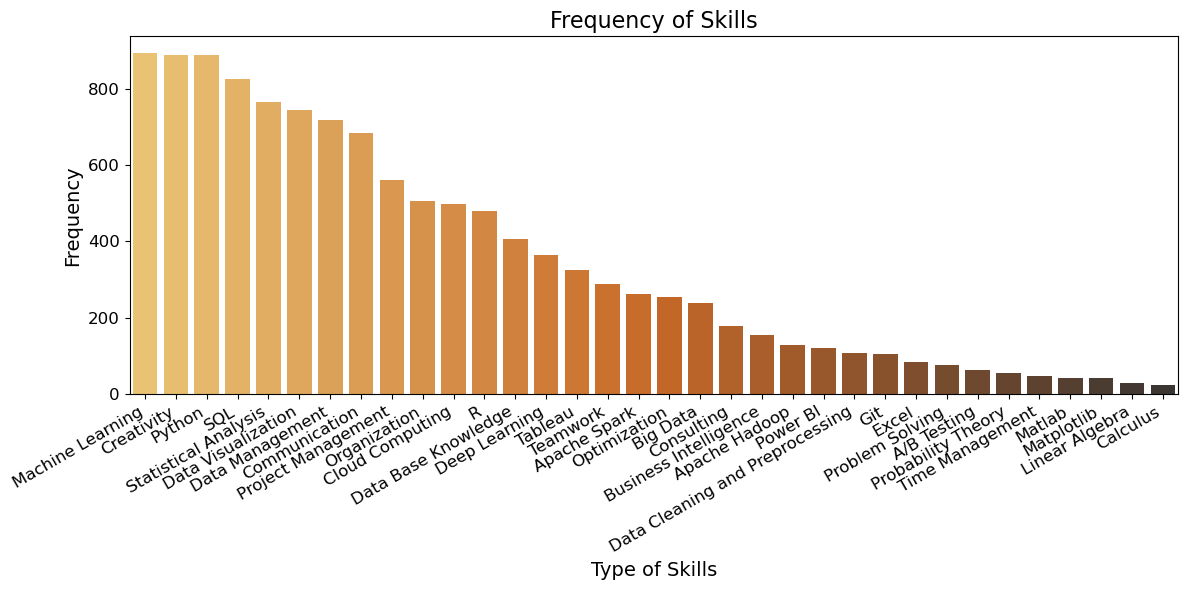

In [21]:
#Graph 1 for the frequency of skills 
import seaborn as sns

# Get the sums of each skill and sort in descending order
skill_counts = plotting.sum().sort_values(ascending=False)

# Create a bar plot of the skill counts using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=skill_counts.index, y=skill_counts.values, palette='YlOrBr_d')
plt.title('Frequency of Skills', fontsize=16)
plt.xlabel('Type of Skills', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

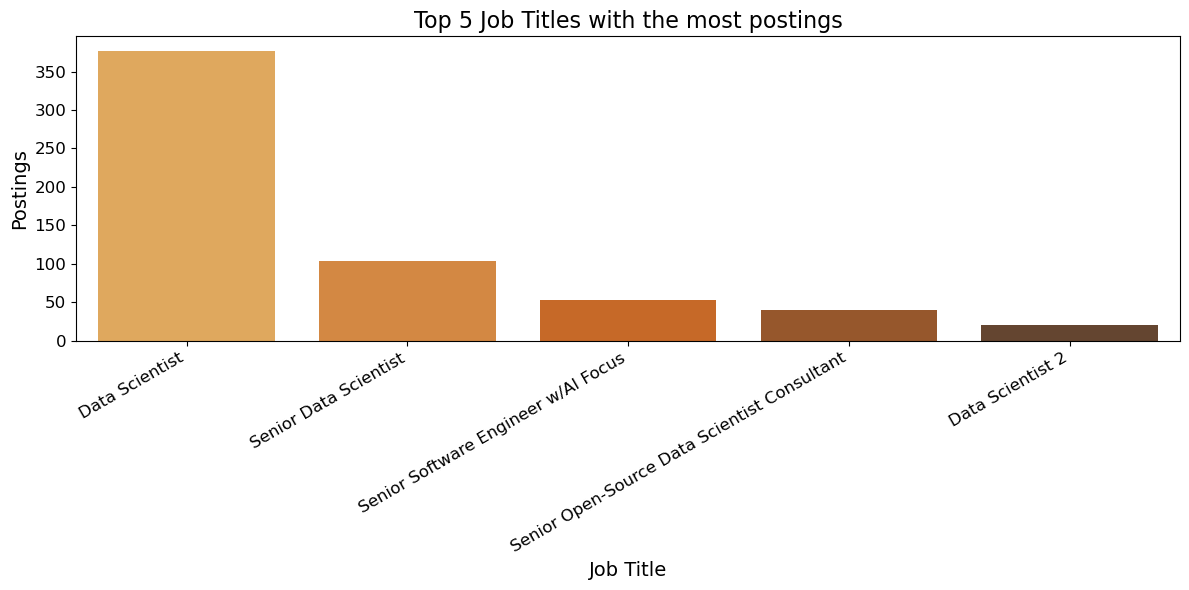

In [22]:
#Plot 2 for the jobs with the most postings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

job_counts = res['Title'].value_counts().sort_values(ascending=False)
# Get the top 10 companies by count
top_jobs = job_counts.head(5)

# Create a bar plot of the top 5 jobs using seaborn
plt.figure(figsize=(12, 6)) 
sns.barplot(x=top_jobs.index, y=top_jobs.values, palette='YlOrBr_d')
plt.title('Top 5 Job Titles with the most postings', fontsize=16)
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Postings', fontsize=14)
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## Hierarchal Clustering

In [23]:
# Import statements for hierarchal clustering
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
from scipy import zeros as sci_zeros
from scipy.spatial.distance import euclidean

In [24]:
#prepare a proximity matrix of zeroes
D = np.zeros([plotting.shape[1],plotting.shape[1]])


In [25]:
#Go through the ngrams and fill in proximity matrix. More close the smaller the number will be
for i in range(plotting.shape[1]):
    for j in range(plotting.shape[1]):
        for k in range(plotting.shape[0]):
            if plotting.iloc[k,i] != plotting.iloc[k,j]:
                D[i,j] += 1
                

In [26]:
print(D)

[[  0. 857. 422. ... 759. 845. 586.]
 [857.   0. 809. ... 536.  92. 691.]
 [422. 809.   0. ... 719. 815. 576.]
 ...
 [759. 536. 719. ...   0. 538. 573.]
 [845.  92. 815. ... 538.   0. 643.]
 [586. 691. 576. ... 573. 643.   0.]]


[]

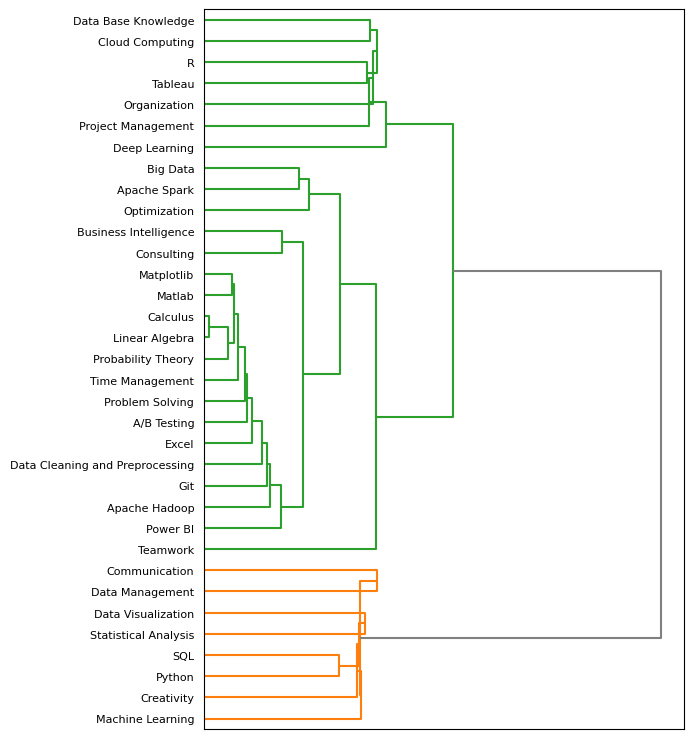

In [27]:
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

Y = sch.linkage(D, method='centroid')
num_clusters = 10


fig = plt.figure(figsize=(12,12))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])


#Hierarchal clustering
clusters = fcluster(Y, t=num_clusters, criterion='distance')
colors = plt.cm.tab10(clusters.astype(float) / num_clusters)
#Show the dendrogram
Z1 = dendrogram(Y, orientation='right', above_threshold_color='gray')

labels = plotting.columns[Z1['leaves']]
ax1.set_xticks([])
ax1.set_yticklabels(labels)



# Color code the labels based on cluster
idx = Z1['leaves']
clusters = fcluster(Y, t=10, criterion='maxclust')




plt.plot() # supress prints

## KMean Clustering

In [28]:
# Find the optimal amount of clusters for the embedded data
from sklearn.cluster import KMeans
wcss = []
means = []
num_clusters = 15 

for j in range(10):
    wcss = []
    #Loop through the 20 clusters
    for i in range(1, num_clusters+1):
        #Find the clusters and append the Sum of square values to list
        kmeans = KMeans(n_clusters=i, random_state=j, n_init = 10)
        kmeans.fit(res.embeddings)
        wcss.append(kmeans.inertia_)

        # Get cluster centers
        cluster_centers = kmeans.cluster_centers_
    #Save Sum of square for each random state
    means.append(wcss)

    
    
    

C:\Users\patel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Window

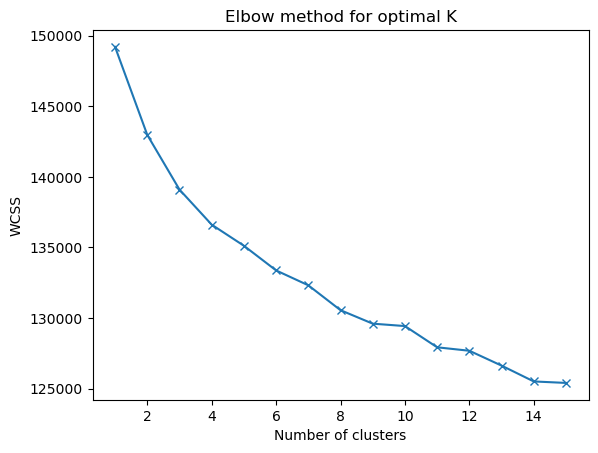

In [29]:
result = np.mean(np.array(means), axis=0)
#plot the results. 
plt.plot(range(1, num_clusters+1), result, marker ='x')
plt.title("Elbow method for optimal K")
plt.xlabel('Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

Based on the KMeans clustering, 10 clusters was chosen. 

In [30]:
#K means clustering
kmeans = KMeans(n_clusters=10, random_state=10)
cluster_labels = kmeans.fit_predict(res.embeddings)
cluster_centers = kmeans.cluster_centers_

C:\Users\patel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [31]:
#Based on the embedded data, the cluster with the highest frequency of the skill will be assigned to that respective skill
print(len(cluster_labels))
#1339 cluster labels and there are 34 skills of interest hence 34 rows.

best_skills = np.zeros(34)


#Code to see how many items are in each cluster. 
test = np.unique(cluster_labels, return_counts=True)
print(test)
print(plotting.columns[1])


for j in range(0,34):
    counter = 0
    for i in range(0,10):
        index_cluster = np.where(cluster_labels==i)[0]
        temp = plotting.iloc[index_cluster,:].sum().sort_values(ascending=False)
        desired_value = temp.loc[plotting.columns[j]]
        if desired_value > counter:
            best_skills[j] = i
            counter = desired_value

                    
    

print(best_skills)


1339
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([510,   6, 300,  27,  16,  82,  91, 146,   5, 156], dtype=int64))
Matlab
[0. 6. 0. 2. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 2. 0. 0. 0. 0. 0.]


In [32]:
from sklearn import preprocessing
temp = np.array(best_skills)
temp1 = temp.reshape(-1,1)

#Clusters will be 1 feature.Ensure to normalize the data
scaler = preprocessing.StandardScaler().fit(temp1)
cluster_normalized = scaler.transform(temp1)


In [33]:
#Feature 2: Business, Soft, Technical, Programming Skills
#Based on the info provided we can further deduce whether the skills in each cluster were primarily soft or hard skills. 
skill_type = []
#Based on the order the first 11 features are Programming skills, the next 14 skills are technical skills and the final 9 skills are soft skills
skill_type = [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2]
print(len(skill_type))



temp = np.array(skill_type)
temp1 = temp.reshape(-1,1)

#Scale and Normalize the Data
scaler = preprocessing.StandardScaler().fit(temp1)
skill_normalized = scaler.transform(temp1)

34


In [34]:
#Feature 3, skill percentage in reserach positions
#Define keywords related to research positions
research_pos = []
for ir, dfr in results.iterrows():
    cleantext = str(dfr["Descriptions"])

    if("research " in cleantext.lower()) or ("research," in cleantext.lower()) or ("research." in cleantext.lower()):
        research_pos.append(1)
    else:
        research_pos.append(0)

print(np.array(research_pos).sum())        
#Find percentage of skill per total position within this category
research_per = []
for j in range(0,34):
    counter = 0
    for i in range(len(research_pos)):
        if research_pos[i] == plotting.iloc[i,j]:
            counter +=1
    research_per.append(counter/np.array(research_pos).sum())

temp = np.array(research_per)
temp1 = temp.reshape(-1,1)

#Scale and Normalize the Data
scaler = preprocessing.StandardScaler().fit(temp1)
research_normalized = scaler.transform(temp1)  

545


In [35]:
#Feature 4, skill percentage in senior positions
#Define keywords related to research positions
senior_pos = []
for ir, dfr in results.iterrows():
    cleantext = str(dfr["Descriptions"])

    if("senior" in cleantext.lower()) or ("senior," in cleantext.lower()) or ("senior." in cleantext.lower()):
        senior_pos.append(1)
    else:
        senior_pos.append(0)
        
#Find percentage of skill per total position within this category
senior_per = []
for j in range(0,34):
    counter = 0
    for i in range(len(senior_pos)):
        if senior_pos[i] == plotting.iloc[i,j]:
            counter +=1
    senior_per.append(counter/np.array(senior_pos).sum())

temp = np.array(senior_per)
temp1 = temp.reshape(-1,1)

#Scale and Normalize the Data
scaler = preprocessing.StandardScaler().fit(temp1)
senior_normalized = scaler.transform(temp1)  

In [36]:
#Feature 5, skill percentage in remote positions
#Define keywords related to research positions
remote_pos = []
for ir, dfr in results.iterrows():
    cleantext = str(dfr["Descriptions"])

    if("remote" in cleantext.lower()) or ("remote," in cleantext.lower()) or ("remote." in cleantext.lower()):
        remote_pos.append(1)
    else:
        remote_pos.append(0)
        
#Find percentage of skill per total position within this category
remote_per = []
for j in range(0,34):
    counter = 0
    for i in range(len(remote_pos)):
        if remote_pos[i] == plotting.iloc[i,j]:
            counter +=1
    remote_per.append(counter/np.array(remote_pos).sum())

temp = np.array(remote_per)
temp1 = temp.reshape(-1,1)

#Scale and Normalize the Data
scaler = preprocessing.StandardScaler().fit(temp1)
remote_normalized = scaler.transform(temp1)  

In [37]:
#Feature 6, frequency of skills
freq_per = []
for j in range(0,34):
    counter = 0
    for i in range(len(plotting.iloc[:,1])):
        if remote_pos[i] == plotting.iloc[i,j]:
            counter +=1
    freq_per.append(counter/len(plotting.iloc[:,1]))

temp = np.array(freq_per)
temp1 = temp.reshape(-1,1)

#Scale and Normalize the Data
scaler = preprocessing.StandardScaler().fit(temp1)
freq_normalized = scaler.transform(temp1) 

In [38]:
#Feature 7, skill percentage in entry level positions
beginner_per = plotting.iloc[:,11:25].sum(axis=1)/14
#Extract positions in terms of keywords
begin_pos = []
for ir, dfr in results.iterrows():
    cleantext = str(dfr["Descriptions"])

    if("entry" in cleantext.lower()) or ("grad," in cleantext.lower()) or ("graduate" in cleantext.lower()) or ("coop" in cleantext.lower() or ("co-op" in cleantext.lower()) or ("intern" in cleantext.lower())):
        begin_pos.append(1)
    else:
        begin_pos.append(0)
#Find percentage of skill per total position within this category
begin_per = []
for j in range(0,34):
    counter = 0
    for i in range(len(begin_pos)):
        if begin_pos[i] == plotting.iloc[i,j]:
            counter +=1
    begin_per.append(counter/np.array(begin_pos).sum())

temp = np.array(begin_per)
temp1 = temp.reshape(-1,1)

#Scale and Normalize the Data
scaler = preprocessing.StandardScaler().fit(temp1)
begin_normalized = scaler.transform(temp1)  


In [39]:
#Feature 8, clustering algorithm results in terms of ratios, Built off of feature 1, but ratio instead of frequency
print(len(cluster_labels))
#1339 cluster labels and there are 34 skills of interest hence 34 rows.

best_skills1 = np.zeros(34)

for j in range(0,34):
    counter = 0
    for i in range(0,10):
        index_cluster = np.where(cluster_labels==i)[0]
        temp = plotting.iloc[index_cluster,:].sum().sort_values(ascending=False)
        desired_value = temp.loc[plotting.columns[j]]
        test = np.unique(cluster_labels, return_counts=True)
        test1 = test[1][i]
        if (desired_value/test1)> counter:
            best_skills1[j] = i
            counter = desired_value/test1

temp = np.array(best_skills)
temp1 = temp.reshape(-1,1)

#Scale and Normalize the Data
scaler = preprocessing.StandardScaler().fit(temp1)
best_skills1_normalized = scaler.transform(temp1)  


1339


In [40]:
#Feature 9, percentage skills in roles for data analytics and visual aids
#Define keywords related to analytics 
analytics_pos = []
for ir, dfr in results.iterrows():
    cleantext = str(dfr["Descriptions"])

    if("analytics" in cleantext.lower()) or ("analytics," in cleantext.lower()) or ("analytics." in cleantext.lower()):
        analytics_pos.append(1)
    elif("visual" in cleantext.lower()) or ("visualize" in cleantext.lower()):
        analytics_pos.append(1)
    elif("present" in cleantext.lower()) or ("present," in cleantext.lower()):
        analytics_pos.append(1)
    else:
        analytics_pos.append(0)
        
analytics_per = []
for j in range(0,34):
    counter = 0
    for i in range(len(analytics_pos)):
        if analytics_pos[i] == plotting.iloc[i,j]:
            counter +=1
    analytics_per.append(counter/np.array(analytics_pos).sum())

temp = np.array(analytics_per)
temp1 = temp.reshape(-1,1)

#Scale and Normalize the Data
scaler = preprocessing.StandardScaler().fit(temp1)
analytics_normalized = scaler.transform(temp1)  

In [41]:
#Feature 10, skill percentage in business/management positions
#Define keywords related to research positions
manage_pos = []
for ir, dfr in results.iterrows():
    cleantext = str(dfr["Descriptions"])

    if("management" in cleantext.lower()) or ("management," in cleantext.lower()) or ("management." in cleantext.lower()):
        manage_pos.append(1)
    elif("manager" in cleantext.lower()) or ("manager," in cleantext.lower()) or ("manager." in cleantext.lower()):
        manage_pos.append(1)
    elif("business" in cleantext.lower()) or ("business," in cleantext.lower()) or ("business." in cleantext.lower()):
        manage_pos.append(1)
    else:
        manage_pos.append(0)
        
#Find percentage of skill per total position within this category

manage_per = []
for j in range(0,34):
    counter = 0
    for i in range(len(manage_pos)):
        if manage_pos[i] == plotting.iloc[i,j]:
            counter +=1
    manage_per.append(counter/np.array(manage_pos).sum())

temp = np.array(manage_per)
temp1 = temp.reshape(-1,1)

#Scale and Normalize the Data
scaler = preprocessing.StandardScaler().fit(temp1)
manage_normalized = scaler.transform(temp1)  

In [42]:
print(np.array(manage_pos).shape)
data_processed = np.column_stack((cluster_normalized,skill_normalized,research_normalized,senior_normalized,remote_normalized,freq_normalized,begin_normalized,best_skills1,analytics_normalized,manage_normalized))



(1339,)


In [43]:
# Find the optimal amount of clusters
from sklearn.cluster import KMeans
wcss = []
means = []
num_clusters = 12

for j in range(10):
    wcss = []
    #Loop through the 20 clusters
    for i in range(1, num_clusters+1):
        #Find the clusters and append the Sum of square values to list
        kmeans = KMeans(n_clusters=i, random_state=j, n_init = 10)
        kmeans.fit(data_processed)
        wcss.append(kmeans.inertia_)

        # Get cluster centers
        cluster_centers = kmeans.cluster_centers_
    #Save Sum of square for each random state
    means.append(wcss)

    
    
    

C:\Users\patel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Window

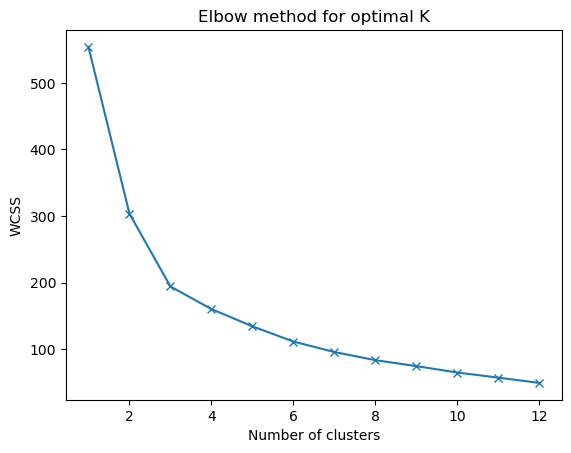

In [44]:
result = np.mean(np.array(means), axis=0)
#plot the results. 
plt.plot(range(1, num_clusters+1), result, marker ='x')
plt.title("Elbow method for optimal K")
plt.xlabel('Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [54]:
kmeans = KMeans(n_clusters=10, random_state=10)
cluster_labels = kmeans.fit_predict(data_processed)
cluster_centers = kmeans.cluster_centers_

C:\Users\patel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


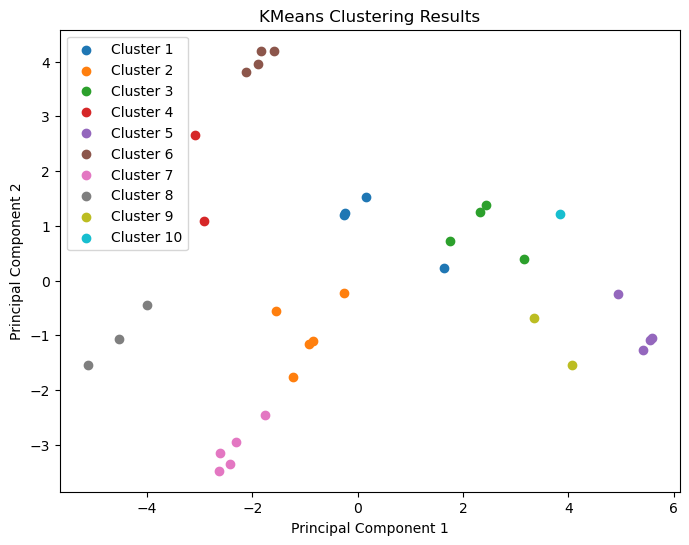

In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2d = pca.fit_transform(data_processed)

# Create a scatter plot
plt.figure(figsize=(8, 6))

for i in range(10):
    plt.scatter(X_2d[cluster_labels == i, 0], X_2d[cluster_labels == i, 1], label=f'Cluster {i + 1}')

plt.title('KMeans Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [56]:
#Print out Clusters
for i in range(len(plotting.columns)):
    print(plotting.columns[i], ":",cluster_labels[i])



Python : 7
Matlab : 9
SQL : 6
Excel : 2
Tableau : 1
Power BI : 2
Git : 5
Apache Hadoop : 5
Apache Spark : 3
R : 1
Matplotlib : 4
Data Management : 6
Big Data : 0
Machine Learning : 6
Deep Learning : 0
Cloud Computing : 1
A/B Testing : 2
Statistical Analysis : 7
Linear Algebra : 4
Calculus : 4
Probability Theory : 4
Data Base Knowledge : 3
Data Cleaning and Preprocessing : 5
Data Visualization : 7
Optimization : 8
Project Management : 1
Consulting : 0
Business Intelligence : 0
Problem Solving : 2
Teamwork : 8
Creativity : 6
Organization : 1
Time Management : 5
Communication : 6
